time/neighborhood -> call type

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dat = pd.read_csv('dat/911_Police_Calls_for_Service.csv', low_memory=False)

In [3]:
# reduce overhead while messing with data
#dat = dat.head(1000)

dat.head()

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Zip Codes
0,2333660,P163072128,11/02/2016 04:46:00 PM,Medium,SD,NARCOTICSOutside,1200 W CROSS ST,21230.0,Washington Village/Pigtown,Southern,932.0,10.0,D7,Washington Village/Pigtown,Census Tract 2102,NaN,"1200 W CROSS ST\nBALTIMORE, MD\n(39.281995, -7...",250.0,177.0,27953.0
1,2334887,P163070732,11/02/2016 09:22:00 AM,High,SW,Traffic Stop,2100 W PRATT ST,21223.0,Carrollton Ridge,Southwestern,841.0,9.0,D8,Southwest Baltimore,Census Tract 2005,Tri-District,"2100 W PRATT ST\nBALTIMORE, MD\n(39.284965, -7...",36.0,279.0,27632.0
2,2334245,P163071480,11/02/2016 01:37:00 PM,Low,SE,LARCENY F/AUTO,HOME DEPOT,21224.0,Pulaski Industrial Area,Southeastern,242.0,1.0,D6,Orangeville/East Highlandtown,Census Tract 2605.01,NaN,"HOME DEPOT BALTIMORE, MD\n(39.499699, -76.641403)",NaN,NaN,3490.0
3,2332907,P163072974,11/02/2016 08:20:00 PM,Medium,ND,911/NO VOICE,5200 YORK RD,21212.0,York-Homeland,Northern,521.0,4.0,D2,North Baltimore/Guilford/Homeland,Census Tract 2711.01,NaN,"5200 YORK RD\nBALTIMORE, MD\n(39.352315, -76.6...",273.0,217.0,14009.0
4,2332699,P163073203,11/02/2016 09:39:00 PM,Medium,NW,COMMON ASSAULT,2500 N ELLAMONT ST,21216.0,Hanlon-Longwood,Northwestern,641.0,7.0,D9,Greater Mondawmin,Census Tract 1507.01,NaN,"2500 N ELLAMONT ST\nBALTIMORE, MD\n(39.315441,...",103.0,46.0,27297.0


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RecordID                     1000 non-null   int64  
 1   CallNumber                   1000 non-null   object 
 2   CallDateTime                 1000 non-null   object 
 3   Priority                     1000 non-null   object 
 4   District                     1000 non-null   object 
 5   Description                  1000 non-null   object 
 6   IncidentLocation             1000 non-null   object 
 7   ZipCode                      994 non-null    float64
 8   Neighborhood                 995 non-null    object 
 9   PoliceDistrict               996 non-null    object 
 10  PolicePost                   996 non-null    float64
 11  CouncilDistrict              996 non-null    float64
 12  SheriffDistricts             996 non-null    object 
 13  Community_Statistic

In [5]:
# Add a column for time and insert data
time = dat['CallDateTime']
times = time.str[11:13]
periods = time.str[20:22]

#pd.get_dummies(periods)

In [6]:
dat.insert(3, "Hour", times, True)

In [7]:
periods = pd.get_dummies(periods)
dat.insert(4, "AM", periods['AM'], True)
dat.insert(5, "PM", periods['PM'], True)

In [18]:
# Convert priority into categorical data
from pandas.api.types import CategoricalDtype

priority_cats = CategoricalDtype(categories=['Non-Emergency', 'Low', 'Medium',  'High'], ordered=True)
dat['Priority'] = dat['Priority'].astype(priority_cats)

dat['Priority']

0             Medium
1               High
2                Low
3             Medium
4             Medium
           ...      
995    Non-Emergency
996           Medium
997             High
998              Low
999              Low
Name: Priority, Length: 1000, dtype: category
Categories (4, object): [Non-Emergency < Low < Medium < High]

In [19]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   RecordID                     1000 non-null   int64   
 1   CallNumber                   1000 non-null   object  
 2   CallDateTime                 1000 non-null   object  
 3   Hour                         1000 non-null   object  
 4   AM                           1000 non-null   uint8   
 5   PM                           1000 non-null   uint8   
 6   Priority                     1000 non-null   category
 7   District                     1000 non-null   object  
 8   Description                  1000 non-null   object  
 9   IncidentLocation             1000 non-null   object  
 10  ZipCode                      994 non-null    float64 
 11  Neighborhood                 995 non-null    object  
 12  PoliceDistrict               996 non-null    object  
 13  Poli

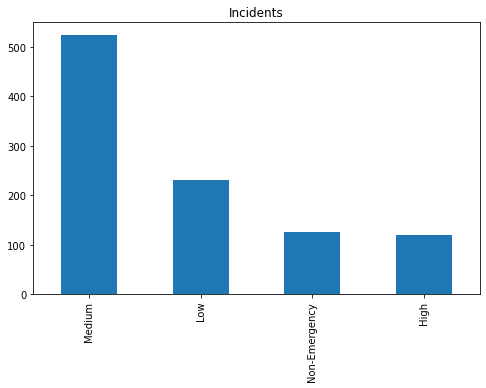

In [38]:
pcount = dat['Priority'].value_counts()

fig = plt.figure(figsize=(8,5))
pcount.plot(kind='bar')

plt.title('Incidents')
#plt.ylabel('Number')
plt.show()

In [70]:
pcount = dat.groupby(['Hour', 'Priority']).count()

pcount.unstack()

RecordID                    CallNumber                  \
Priority Non-Emergency Low Medium High Non-Emergency Low Medium High   
Hour                                                                   
01                  10  21     35    5            10  21     35    5   
02                  11  16     48    9            11  16     48    9   
03                  14  26     65   10            14  26     65   10   
04                   9  24     76    7             9  24     76    7   
05                  16  15     53    8            16  15     53    8   
06                  10  12     25    9            10  12     25    9   
07                   5  18     36    8             5  18     36    8   
08                   9  19     50   17             9  19     50   17   
09                  12  24     32   17            12  24     32   17   
10                  12  16     37   12            12  16     37   12   
11                   6  18     31   10             6  18     31   10   
12                  12  21     36    8            12  21     36    8   

          CallDateTime      ... 2010 Census Neighborhoods       \
Priority Non-Emergency Low  ...                    Medium High   
Hour                        ...                                  
01                  10  21  ...                        35    5   
02                  11  16  ...                        47    8   
03                  14  26  ...                        65   10   
04                   9  24  ...                        74    7   
05                  16  15  ...                        53    7   
06                  10  12  ...                        25    9   
07                   5  18  ...                        35    8   
08                   9  19  ...                        49   16   
09                  12  24  ...                        32   17   
10                  12  16  ...                        35   10   
11                   6  18  ...                        30   10   
12                  12  21  ...                        35    8   

         2010 Census Wards Precincts                     Zip Codes             \
Priority               Non-Emergency Low Medium High Non-Emergency Low Medium   
Hour                                                                            
01                                10  18     35    5            10  21     35   
02                                 9  13     48    8            11  16     48   
03                                12  23     65   10            14  24     65   
04                                 8  19     74    7             9  23     76   
05                                13  11     53    7            16  15     53   
06                                 9   9     25    9            10  12     25   
07                                 4  15     35    8             5  17     36   
08                                 7  19     49   16             8  19     50   
09                                12  21     32   17            12  23     32   
10                                 9  16     35   10            12  16     36   
11                                 5  17     30   10             6  18     31   
12                                10  20     35    8            11  21     36   

               
Priority High  
Hour           
01          5  
02          9  
03         10  
04          7  
05          7  
06          9  
07          8  
08         17  
09         17  
10         12  
11         10  
12          8  

[12 rows x 84 columns]

In [80]:
pcount2 = dat.groupby(['Priority', 'Hour']).count()['RecordID']

pcount2 = pcount2.unstack()
pcount2

Hour,01,02,03,04,05,06,07,08,09,10,11,12
Priority,,,,,,,,,,,,
Non-Emergency,10,11,14,9,16,10,5,9,12,12,6,12
Low,21,16,26,24,15,12,18,19,24,16,18,21
Medium,35,48,65,76,53,25,36,50,32,37,31,36
High,5,9,10,7,8,9,8,17,17,12,10,8


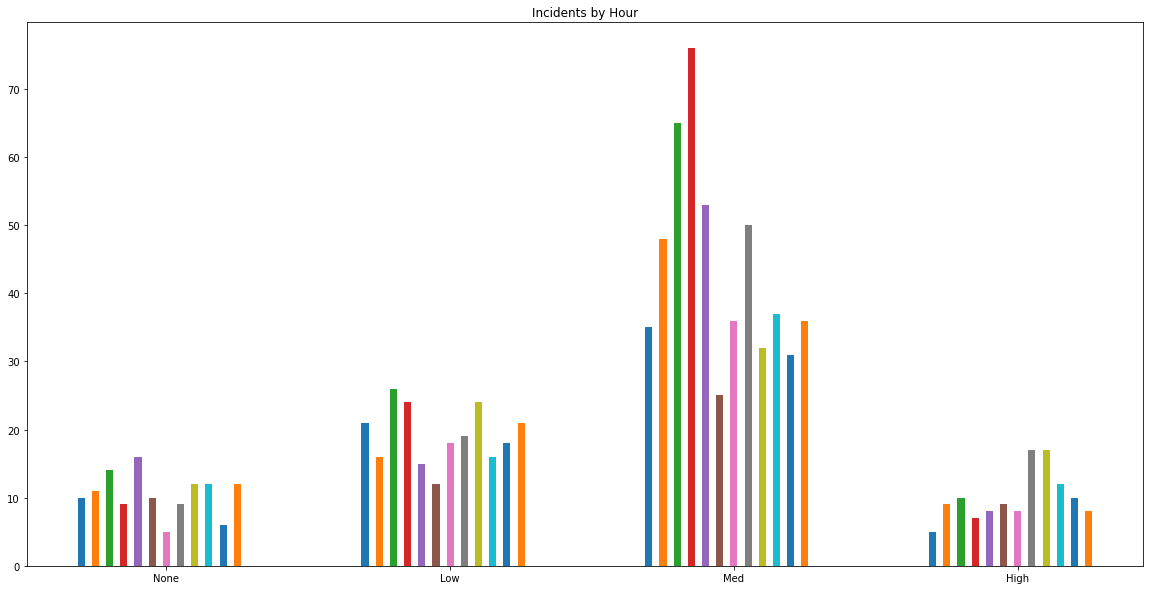

In [104]:
fig, ax = plt.subplots(figsize=(20,10))

labels = dat['Priority'].unique()
x = np.arange(len(labels))  # the label locations
width = 0.025  # the width of the bars

r1 = ax.bar(x-.3, pcount2['01'], width)
r2 = ax.bar(x-.25, pcount2['02'], width)
r3 = ax.bar(x-.2, pcount2['03'], width)
r4 = ax.bar(x-.15, pcount2['04'], width)
r5 = ax.bar(x-.1, pcount2['05'], width)
r6 = ax.bar(x-.05, pcount2['06'], width)
r7 = ax.bar(x, pcount2['07'], width)
r8 = ax.bar(x+.05, pcount2['08'], width)
r9 = ax.bar(x+.1, pcount2['09'], width)
r10 = ax.bar(x+.15, pcount2['10'], width)
r11 = ax.bar(x+.2, pcount2['11'], width)
r12 = ax.bar(x+.25, pcount2['12'], width)

ax.set_xticks(x)
ax.set_xticklabels(['None','Low','Med','High'])
# ax.legend()

plt.title('Incidents by Hour')
plt.show()